# House Prices Prediction
### Predicting the prices of houses based on their property features

In [1]:
# Set up notebook headers
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

pd.reset_option('display.max_rows')

%matplotlib inline
%load_ext autoreload
%autoreload 2

#### Load Raw Data
Read in CSV files containing train and test data from Kaggle.

In [2]:
# Store train data in dataframe 
train = pd.read_csv('./data/train.csv', index_col = 0, na_values = 'NA', keep_default_na = True)
print("Shape of train set:", train.shape, '\n')
train.info()
train.describe()

Shape of train set: (1460, 80) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
# View top 5 rows of train dataframe
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Store test data in dataframe 
test = pd.read_csv('./data/test.csv', index_col = 0, na_values = 'NA', keep_default_na = True)
print("Shape of test set:", test.shape, '\n')
test.info()
test.describe()

Shape of test set: (1459, 79) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    14

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
# View top 5 rows of test dataframe
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


SalePrice column missing from test set as expected - we need to predict for it.

#### Data Checks
Let's check that homes contain NA values where appropriate and if not, modify them accordingly. For example, if a home doesn't contain a basement and there are NA values for the various basement area columns, then we should change these to 0.

Consider the following columns where the name in brackets is the column to check whether a feature is present or not:

- MasVnrArea (MasVnrType).

- GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, and GarageCond (GarageType).

- BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, and BsmtHalfBath (BsmtQual).

- Fireplaces (FireplaceQu).

- PoolArea (PoolQC).

After checking both CSV files, it was found that:

- MasVnrArea/MasVnrType contains NA values - these will be handled in the "Transform Data" step as there is no NA option in the data_description.txt file.

- All garage columns are correctly assigned where GarageType is NA - no garages built in these homes as verified by the data_description.txt file.

- All basement columns are correctly assigned where BsmtQual is NA - no finished basements built in these homes as verified by the data_description.txt file.

- Fireplaces is 0 where FireplaceQu is NA and therefore correctly assigned.

However, in the test.csv file, it was found that:

- There are 2 NA GarageYrBlt records that have a Detchd GarageType. Let's assign these to the same value as YearRemodAdd.

- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, and BsmtHalfBath all have NA values for one home, where BsmtFinType1, BsmtFinType2, and BsmtCond are also NA and therefore should all be 0 as there is no basement.

- There is another home where BsmtFinType1, BsmtFinType2, and BsmtCond are all NA, but BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, and TotalBsmtSF are set to 0 as expected. However, BsmtFullBath and BsmtHalfBath are NA and should be changed to 0.

In [6]:
# Modify NA garage values
garage_filter = (test['GarageYrBlt'].isna()) & ~(test['GarageType'].isna())
test.loc[garage_filter, 'GarageYrBlt'] = test.loc[garage_filter, 'YearRemodAdd']

# Modify NA basement values
bsmt_filter = (test['BsmtFullBath'].isna()) & (test['BsmtHalfBath'].isna())
test.loc[bsmt_filter, 'BsmtFinSF1'] = 0
test.loc[bsmt_filter, 'BsmtFinSF2'] = 0
test.loc[bsmt_filter, 'BsmtUnfSF'] = 0
test.loc[bsmt_filter, 'TotalBsmtSF'] = 0
test.loc[bsmt_filter, 'BsmtFullBath'] = 0
test.loc[bsmt_filter, 'BsmtHalfBath'] = 0

#### Data Exploration
Explore how various attributes in the dataset are related to house price and each other. Visualise any high-level trends for further analysis.

**Correlation Analysis**: Measure the strength of correlation for each of the numerical variables against the Sale Price. Based on the plot below, some numerical variables might not be as important for house prediction. Let's factor this when building the final model.

Text(0.5, 1.0, 'Correlation with Sale Price')

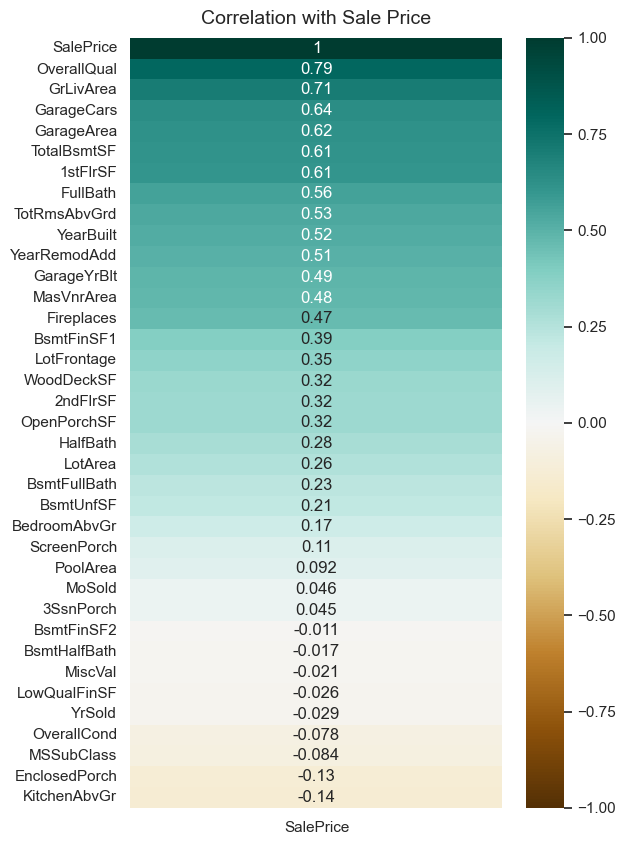

In [7]:
# Consider numerical variables only and plot against SalePrice
train_plot_num = train.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize = (6, 10))
heatmap = sns.heatmap(train_plot_num.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation with Sale Price', fontdict = {'fontsize':14}, pad = 10)

**Data Story 1**: The distribution of sale prices is right skewed as most of the homes have a price of USD100,000-200,000, with the greatest density at around USD130,000. There is a long tail, with the upper bound at just over USD700,000. The lower bound is at USD30,000.

Text(0.5, 0, 'Sale Price (USD)')

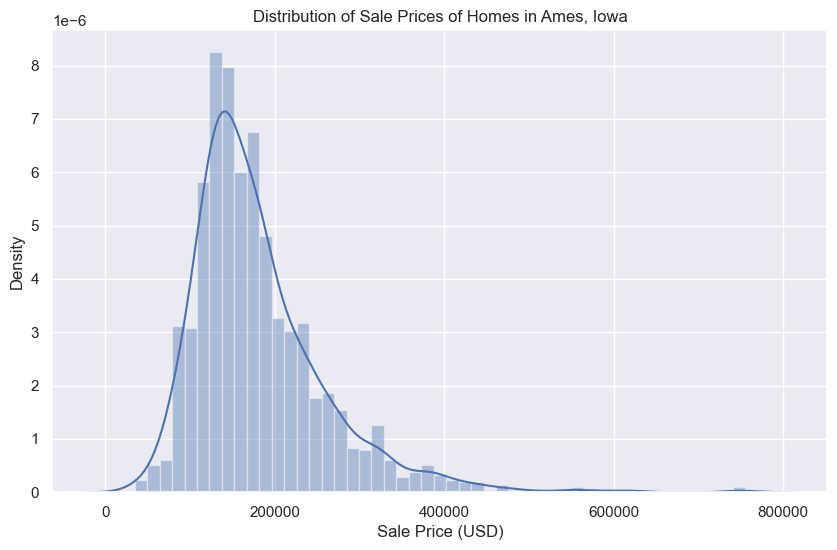

In [8]:
plt.figure(figsize = (10, 6))
ax = sns.distplot(train[["SalePrice"]].values)
ax.set_title("Distribution of Sale Prices of Homes in Ames, Iowa")
ax.set_xlabel("Sale Price (USD)")

**Data Story 2**: The prices fluctuate periodically between 1870 to 1950 but remains centered around a constant figure. From 1950 to the present, there is clear increase in the price with small tremors as the price changed from year to year.

Text(0.5, 0, 'Year Built')

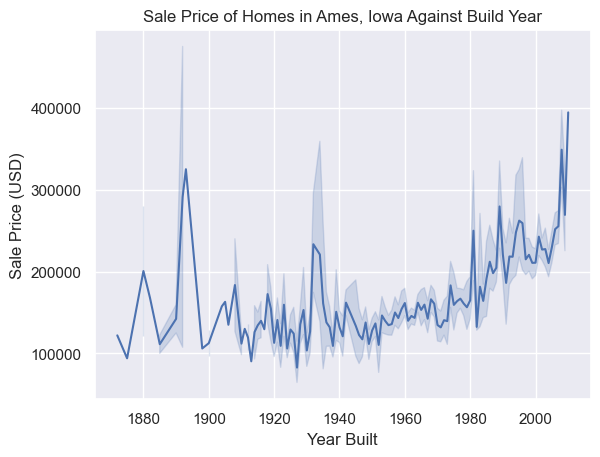

In [9]:
ax = sns.lineplot(x = "YearBuilt", y = "SalePrice", data = train)
ax.set_title("Sale Price of Homes in Ames, Iowa Against Build Year")
ax.set_ylabel("Sale Price (USD)")
ax.set_xlabel("Year Built")

**Data Story 3**: The spread of values seem to be the greatest for 1 and 2 story homes. As expected, the greater the number of levels, the greater the average sale price given that the levels are indeed finished. However, homes with 1.5 levels are an exception to this.

Text(0.5, 0, 'House Style')

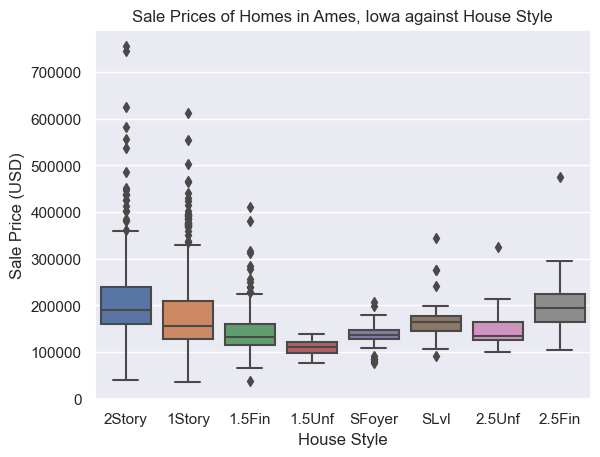

In [10]:
ax = sns.boxplot(x = "HouseStyle", y = "SalePrice", data = train)
ax.set_title("Sale Prices of Homes in Ames, Iowa against House Style")
ax.set_ylabel("Sale Price (USD)")
ax.set_xlabel("House Style")

**Data Story 4**: The average house price clearly increases as the overall quality of a home increases - a positive relationship. The general trend for overall condition is also positive, although the relationship is much weaker caused by dips at ratings of 3 and 6.

Text(0.5, 0, 'Quality/Condition Rating')

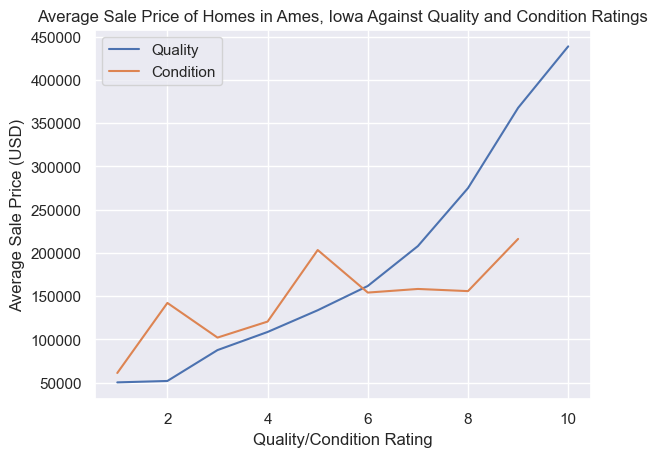

In [11]:
# Find average house price for each category of overall quality and conditions
avg_price_qual = list(train.groupby('OverallQual')['SalePrice'].mean().values)
avg_price_cond = list(train.groupby('OverallCond')['SalePrice'].mean().values)
xaxis = sorted(train['OverallQual'].unique())

# Both overall quality and conditions share the same values so we can use just one of them
sns.lineplot(x = xaxis, y = avg_price_qual, label = 'Quality')
sns.lineplot(x = xaxis[:-1], y = avg_price_cond, label = 'Condition')
plt.title("Average Sale Price of Homes in Ames, Iowa Against Quality and Condition Ratings")
plt.ylabel("Average Sale Price (USD)")
plt.xlabel("Quality/Condition Rating")

**Data Story 5**: There seems to be no clear trend in terms of the type of fences that the homes possess. Surprisngly, the price of homes with no fences have a slightly higher median than the rest along with a larger spread of values. This implies that the Fence column is probably not a useful feature in the final model.

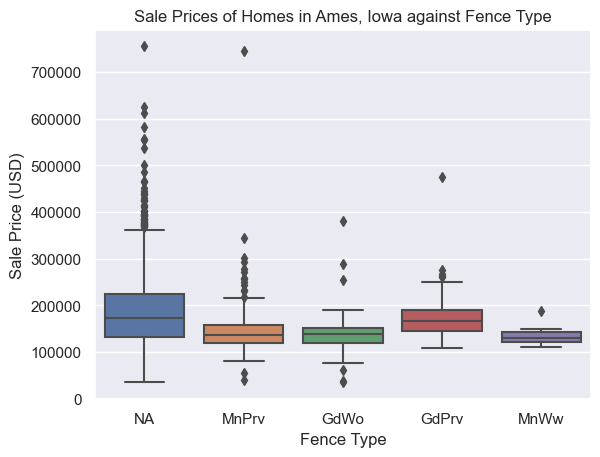

In [12]:
# Include NA values in box plot, so create dummy column and remove it after plot
train['Fence (NA)'] = train['Fence'].fillna('NA')

ax = sns.boxplot(x = "Fence (NA)", y = "SalePrice", data = train)
ax.set_title("Sale Prices of Homes in Ames, Iowa against Fence Type")
ax.set_ylabel("Sale Price (USD)")
ax.set_xlabel("Fence Type")

train.drop(['Fence (NA)'], axis = 1, inplace = True)

**Data Story 6**: There seems to be a positive relationship between the overall quality of materials used for a home and the size of its garage. The plot shows that most homes have a quality of 6 and 7, with garage areas ranging between 400-600 ft^2 and exhibiting right-skewness.

<Figure size 800x1000 with 0 Axes>

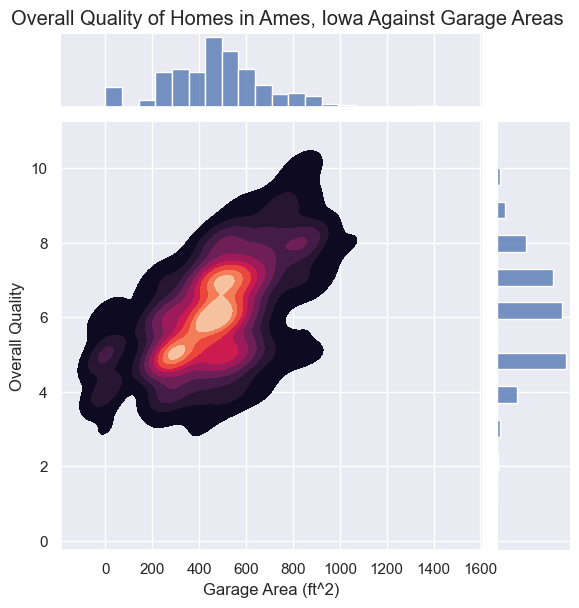

In [13]:
plt.figure(figsize = (8, 10))
ax = sns.JointGrid(x = "GarageArea", y = "OverallQual", data = train)
ax.plot_joint(sns.kdeplot, fill = True, cmap = "rocket")
ax.plot_marginals(sns.histplot, bins = 20)
ax.fig.suptitle("Overall Quality of Homes in Ames, Iowa Against Garage Areas", y = 1.01)
ax.set_axis_labels("Garage Area (ft^2)", "Overall Quality")

**Data Story 7**: After disregarding the outliers for lot area, it is clear that the feature has a positive relationship with ground living area - they increase together. The contours indicate that most ground living areas are between 1,000-2,000 ft^2 and the lot areas are just under 10,000 ft^2. Whilst there is some scatter along the axes extremities, the grouping in the bottom left corner supports the positive trend.

Text(0.5, 0, 'Ground Living Area (ft^2)')

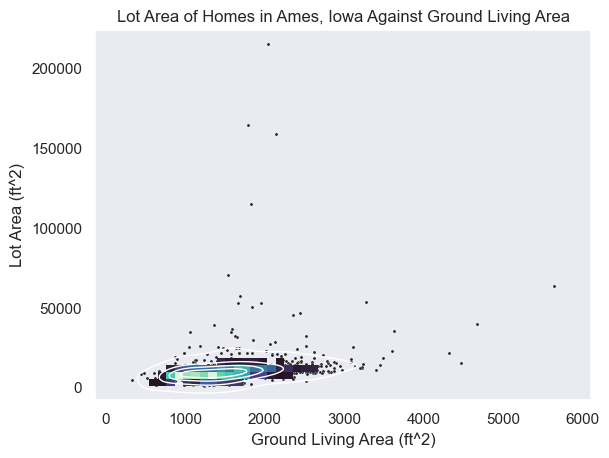

In [14]:
sns.set_theme(style = "dark")
ax = sns.scatterplot(x = "GrLivArea", y = "LotArea", data = train, s = 5, color = ".15")
ax = sns.histplot(x = "GrLivArea", y = "LotArea", data = train, bins = 50, pthresh = .1, cmap = "mako")
ax = sns.kdeplot(x = "GrLivArea", y = "LotArea", data = train, levels = 5, color = "w", linewidths = 1)
ax.set_title("Lot Area of Homes in Ames, Iowa Against Ground Living Area")
ax.set_ylabel("Lot Area (ft^2)")
ax.set_xlabel("Ground Living Area (ft^2)")

Text(0.5, 0, 'Ground Living Area (ft^2)')

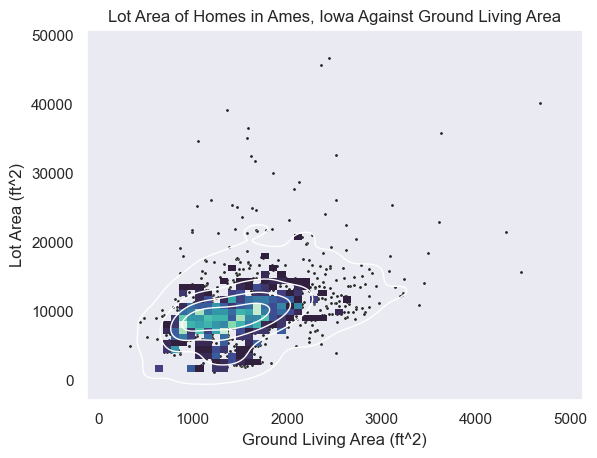

In [15]:
# Ignore outliers where lot area is greater than 50000
target = train[train.LotArea < 50000]
ax = sns.scatterplot(x = "GrLivArea", y = "LotArea", data = target, s = 5, color = ".15")
ax = sns.histplot(x = "GrLivArea", y = "LotArea", data = target, bins = 50, pthresh = .1, cmap = "mako")
ax = sns.kdeplot(x = "GrLivArea", y = "LotArea", data = target, levels = 5, color = "w", linewidths = 1)
ax.set_title("Lot Area of Homes in Ames, Iowa Against Ground Living Area")
ax.set_ylabel("Lot Area (ft^2)")
ax.set_xlabel("Ground Living Area (ft^2)")

#### Transform Data
Split the datasets into numerical and categorical variables for model creation and dind the number of missing values in each of the columns. Some variables may also be dropped due to missing values, whilst others will be imputed based on column means/modes.

In [17]:
def splitting(data):

    # Select data types
    data_num = data.select_dtypes(include = ['float64', 'int64'])
    data_cat = data.select_dtypes(include = 'object')

    return data_num, data_cat

# Split datasets into numerical and categorical features
train_num, train_cat = splitting(train)
test_num, test_cat = splitting(test)

# Remove 'SalePrice' from training set
Y = train_num['SalePrice']
train_num = train_num.drop('SalePrice', axis = 1)

In [18]:
# Find proportion of missing values in numerical train dataset
train_num.isna().mean() * 100

MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
dtype: float64

In [19]:
# Find proportion of missing values in numerical test dataset
test_num.isna().mean() * 100

MSSubClass        0.000000
LotFrontage      15.558602
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        1.028101
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.209047
GarageCars        0.068540
GarageArea        0.068540
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
dtype: float64

In [20]:
# Find proportion of missing values in categorical train dataset
train_cat.isna().mean() * 100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [21]:
# Find proportion of missing values in categorical test dataset
test_cat.isna().mean() * 100

MSZoning          0.274160
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType       61.274846
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.000000
KitchenQual       0.068540
Functional        0.137080
FireplaceQu      50.034270
GarageType        5.209047
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
P

Let's remove columns with a high proportion of missing values (>10%), provided that NA is not one of the options for a column in the data_description.txt file. Let's also remove Utilities as a very large proportion of its values are the same.

In addition, the correlation heatmap in the "Data Exploration" section suggests that some variables don't have a relationship with SalePrice at all. Thus, we can remove any columns where the correlation coefficient is less than 0.25.

In [22]:
remove_cols = ['Utilities']

# Extract names of numerical variables that aren't correlated to SalePrice
correlation_matrix = train_plot_num.corr()
sorted_correlation = correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False)
price_filter = sorted_correlation['SalePrice'] < 0.25

# Add values to remove_cols list
remove_cols = list(sorted_correlation[price_filter].index) + remove_cols

def dropfeatures(data, cols):

    # Drop columns with over 10% missing data
    drop = []
    for i in data.columns:
        if (data[i].isna().mean()) > 0.1 or (i in cols):
            drop.append(i)

    dropped = data.drop(drop, axis = 1)

    return dropped

# Drop relevant features from both numerical sets
train_num = dropfeatures(train_num, remove_cols)
test_num = dropfeatures(test_num, remove_cols)
train_cat = dropfeatures(train_cat, remove_cols)
test_cat = dropfeatures(test_cat, remove_cols)

Use the column mean to impute numerical variables.

In [23]:
# Transform train set
train_num_imp = train_num.fillna(train_num.mean())
train_num_imp.isna().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [24]:
# Transform test set
test_num_imp = test_num.fillna(test_num.mean())
test_num_imp.isna().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

Use the column mode to impute categorical variables provided that NA is not one of the values for a column as given in the data_description.txt file.

In [25]:
# Transform categorical variables
def replaceNA(data, cols, mode):

    for i in data.columns:
        if i in cols:
            data[i].fillna(mode[i][0], inplace = True)

    return data

# Only the following columns have no NA option in the data description and hence must be imputed
cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',  'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition']

# Replace NAs with column modes
train_cat = replaceNA(train_cat, cat_cols, train_cat.mode())

# Replace NAs with column modes
test_cat = replaceNA(test_cat, cat_cols, test_cat.mode())

We will need to combine the train and test categorical datasets in order to perform one-hot encoding. Each dataset could contain a different number of unique values across it columns and hence combining them ensure the output is aligned.

In [26]:
# Encode categorical features after combining the train and test sets to ensure one hot encoding works as expected
train_rows = train_cat.shape[0]
comb_cat = pd.concat([train_cat, test_cat], axis = 0)
comb_cat_enc = pd.get_dummies(comb_cat)

# Split combined dataset back to train and test
train_cat_enc = comb_cat_enc.iloc[:train_rows]
test_cat_enc = comb_cat_enc.iloc[train_rows:]

train_cat_enc.isna().sum()

MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Street_Grvl              0
Street_Pave              0
LotShape_IR1             0
LotShape_IR2             0
LotShape_IR3             0
LotShape_Reg             0
LandContour_Bnk          0
LandContour_HLS          0
LandContour_Low          0
LandContour_Lvl          0
LotConfig_Corner         0
LotConfig_CulDSac        0
LotConfig_FR2            0
LotConfig_FR3            0
LotConfig_Inside         0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
Neighborhood_Blmngtn     0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
N

In [27]:
test_cat_enc.isna().sum()

MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Street_Grvl              0
Street_Pave              0
LotShape_IR1             0
LotShape_IR2             0
LotShape_IR3             0
LotShape_Reg             0
LandContour_Bnk          0
LandContour_HLS          0
LandContour_Low          0
LandContour_Lvl          0
LotConfig_Corner         0
LotConfig_CulDSac        0
LotConfig_FR2            0
LotConfig_FR3            0
LotConfig_Inside         0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
Neighborhood_Blmngtn     0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
N

#### Feature Engineering
Create new features to enhance the number options for model creation.

In [28]:
# Find useful ratios between existing features and add them to both numerical sets
train_num['LivingAgainstLotArea'] = train_num['GrLivArea'] / train_num['LotArea']
train_num['AreaPerRoom'] = train_num['GrLivArea'] / train_num['TotRmsAbvGrd']
train_num['LivLotRatio'] = train_num['GrLivArea'] / train_num['LotArea']

test_num['LivingAgainstLotArea'] = test_num['GrLivArea'] / test_num['LotArea']
test_num['AreaPerRoom'] = test_num['GrLivArea'] / test_num['TotRmsAbvGrd']
test_num['LivLotRatio'] = test_num['GrLivArea'] / test_num['LotArea']

In [29]:
# Combine numerical and categorical data
train_cat_enc = train_cat_enc.set_index(train_num_imp.index)
train_merged = pd.concat([train_num_imp, train_cat_enc], axis = 1).reindex(train_num_imp.index)

test_cat_enc = test_cat_enc.set_index(test_num_imp.index)
test_merged = pd.concat([test_num_imp, test_cat_enc], axis = 1).reindex(test_num_imp.index)

#### Model Creation
Build and compare various regression models and optimise their hyperparameters for best performance. Evaluate the models and compare their predictions to see how well they fit to the actual values.

**Random Forest**

In [30]:
# Adjust hyperparameters
params_rf = [{'n_estimators': [50, 100, 150, 200],          # Number of trees in the forest
           'max_depth': [10, 20, 30],                       # Maximum number of levels in the tree
           'max_features': ['auto', 'sqrt', 'log2']}]       # Maximum number of features used to train model

# Train model for various parameters using grid search
rf_reg = RandomForestRegressor()
grid_rf = GridSearchCV(rf_reg, params_rf, cv = 10, scoring = 'neg_root_mean_squared_error')
grid_rf.fit(train_merged, Y)

# Get the best estimator
best_rf = grid_rf.best_estimator_

# Predict on the test set
preds_rf = pd.DataFrame(best_rf.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])
print("Best score found:", -grid_rf.best_score_)

Best score found: 28409.61254279395


**AdaBoost**

In [31]:
# Adjust hyperparameters
params_ab = [{'n_estimators': [50, 100, 200, 500],           # Number of weak learners (decision trees)
           'learning_rate': [0.01, 0.5, 1.0, 2.0],           # Weighting of weak learners' contribution
           'loss': ['linear', 'square', 'exponential']       # Loss function to use when updating weights
}]

# Train model for various parameters using grid search
ab_reg = AdaBoostRegressor()
grid_ab = GridSearchCV(ab_reg, params_ab, cv = 10, scoring = 'neg_root_mean_squared_error')
grid_ab.fit(train_merged, Y)

# Get the best estimator
best_ab = grid_ab.best_estimator_

# Predict on the test set
preds_ab = pd.DataFrame(best_ab.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])
print("Best score found:", -grid_ab.best_score_)

Best score found: 33659.907211027574


**SGD**

In [32]:
# Adjust hyperparameters
params_sgd = [{'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],      # Loss function to be optimized
           'penalty': ['l2', 'l1', 'elasticnet'],                             # Regularization term
           'alpha': [0.001, 0.01, 0.1, 1.0, 5.0],                             # Constant that multiplies the regularization term
           'max_iter': [1000, 5000, 20000]                                    # Maximum number of iterations to run
}]

# Train model for various parameters using grid search
sgd_reg = SGDRegressor()
grid_sgd = GridSearchCV(sgd_reg, params_sgd, cv = 10, scoring = 'neg_root_mean_squared_error')
grid_sgd.fit(train_merged, Y)

# Get the best estimator
best_sgd = grid_sgd.best_estimator_

# Predict on the test set
preds_sgd = pd.DataFrame(best_sgd.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])
print("Best score found:", -grid_sgd.best_score_)

Best score found: 44383.20186173752


**XGB**

In [33]:
# Adjust hyperparameters
params_xgb = [{'n_estimators': [50, 100, 200, 500],      # Number of boosting rounds
           'learning_rate': [0.01, 0.1, 0.5, 2.0],       # Step size shrinkage used to prevent overfitting
           'max_depth': [3, 5, 7]                        # Maximum depth of a tree
}]

# Train model for various parameters using grid search
xgb_reg = XGBRegressor()
grid_xgb = GridSearchCV(xgb_reg, params_xgb, cv = 10, scoring = 'neg_root_mean_squared_error')
grid_xgb.fit(train_merged, Y)

# Get the best estimator
best_xgb = grid_xgb.best_estimator_

# Predict on the test set
preds_xgb = pd.DataFrame(best_xgb.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])
print("Best score found:", -grid_xgb.best_score_)

Best score found: 25912.656808859778


The scores above indicate that the best performing model is XGB, followed by Random Forest. Let's plot the predictions of these models and see how well they fit to the actual values in the train set.

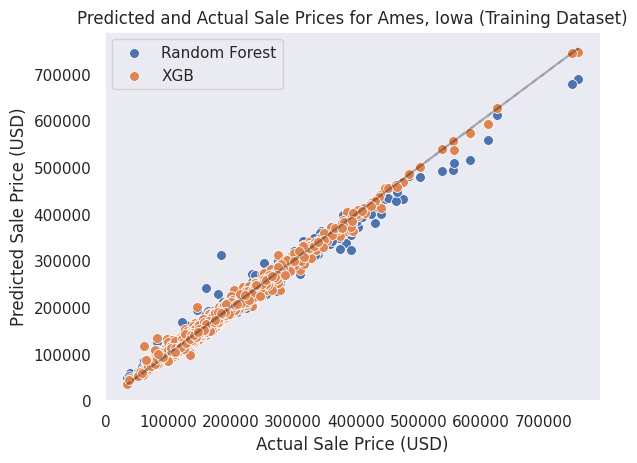

In [44]:
# Plot predictions and actual values
plt.figure()
sns.scatterplot(x = Y, y = list(best_rf.predict(train_merged)), label = 'Random Forest', s = 50, marker = 'o')
sns.scatterplot(x = Y, y = list(best_xgb.predict(train_merged)), label = 'XGB', s = 50, marker = 'o')

# Plot line y = x
plt.plot(Y, Y, color = 'black', alpha = 0.35, linestyle = '--')
plt.title('Predicted and Actual Sale Prices for Ames, Iowa (Training Dataset)')
plt.xlabel('Actual Sale Price (USD)')
plt.ylabel('Predicted Sale Price (USD)')
plt.legend()

The scatter plot shows that the XGB predicted prices are positioned well relative to the y = x line (tight and distributed either side), and therefore is a reliable model for the purposes of this project.